<a href="https://colab.research.google.com/github/vaishnavipathare/Calculator/blob/main/CatAndDogClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator


Let's break down the parameters used in the `ImageDataGenerator`:

1. **rescale=1./255:**
   - This parameter scales the pixel values of the images. By dividing each pixel value by 255, it normalizes the values to be in the range [0, 1]. This is a common preprocessing step in deep learning to ensure numerical stability.

2. **shear_range=0.2:**
   - Shear transformation tilts the image along its axis. This parameter controls the intensity of shear. In this case, it is set to 0.2, meaning that the shear angle can vary up to 0.2 radians.

3. **zoom_range=0.2:**
   - Zoom transformation randomly zooms into the image. The zoom range parameter sets the range for the zoom. Here, it is set to 0.2, indicating that the image can be zoomed in or out by up to 20%.

4. **horizontal_flip=True:**
   - Horizontal flip randomly flips the image horizontally. Setting this parameter to `True` enables horizontal flipping, which can provide more variability in the training data. This is useful for tasks where the orientation of the object in the image does not affect its classification.

In summary, the `ImageDataGenerator` is configured to perform data augmentation on the input images during the training process. Data augmentation is a technique used to artificially increase the size of the training dataset by applying various transformations to the existing images, helping the model generalize better and become more robust to different variations in the input data.

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip= True)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Cat_and_Dog/train',
                                                 target_size = (64,64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 557 images belonging to 2 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip= True)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Cat_and_Dog/test',
                                                 target_size = (64,64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 140 images belonging to 2 classes.


In [ ]:
cnn = tf.keras.models.Sequential()

- `filters`: This specifies the number of filters (also known as kernels) in the convolutional layer. In this case, you have set it to 32, meaning there will be 32 filters in this layer.

- `kernel_size`: This parameter defines the size of the convolutional kernel (or filter). You've set it to 3, indicating that each filter will have a 3x3 size.

- `activation`: The activation function used in the layer. In this case, it's set to 'relu', which means Rectified Linear Unit (ReLU) activation will be applied after the convolution operation.

- `input_shape`: This specifies the input shape for the first layer in your neural network. In this example, you're using an input shape of [64, 64, 3], which implies that your input data is expected to have dimensions of 64x64 pixels and 3 color channels (e.g., for RGB images).

# First Layer

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',
                               input_shape=[64,64,3]))

- `pool_size`: This parameter specifies the size of the pooling window. In your code, you've set it to 2, which means that a 2x2 window will be used for pooling. During max-pooling, the maximum value in each 2x2 window of the input will be retained, and the other values will be discarded.

- `strides`: This parameter determines the stride of the pooling operation. In your code, it's also set to 2, which means that the pooling window will move 2 units at a time in both the horizontal and vertical directions. This reduces the size of the feature maps, effectively downsampling the data.

The MaxPooling2D layer is often used in CNNs to reduce the spatial dimensions of the feature maps produced by convolutional layers, helping to capture important features while reducing computational complexity.

In [ ]:
# Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

# Second Layer

In [ ]:

cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',
                               input_shape=[64,64,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Flattening

In [ ]:

cnn.add(tf.keras.layers.Flatten())

# Full Connection

In [ ]:
cnn.add(tf.keras.layers.Dense(units= 128,activation='relu'))

# Output Layer

In [ ]:
cnn.add(tf.keras.layers.Dense(units= 1,activation='sigmoid'))

In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               8

# Training the CNN

In [ ]:
cnn.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [ ]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
18/18 [==============================] - 178s 10s/step - loss: 0.7334 - accuracy: 0.5206 - val_loss: 0.6954 - val_accuracy: 0.5214
Epoch 2/25
18/18 [==============================] - 11s 603ms/step - loss: 0.6882 - accuracy: 0.5745 - val_loss: 0.6893 - val_accuracy: 0.5643
Epoch 3/25
18/18 [==============================] - 11s 593ms/step - loss: 0.6714 - accuracy: 0.5799 - val_loss: 0.7174 - val_accuracy: 0.4857
Epoch 4/25
18/18 [==============================] - 10s 574ms/step - loss: 0.6622 - accuracy: 0.6158 - val_loss: 0.7102 - val_accuracy: 0.5429
Epoch 5/25
18/18 [==============================] - 10s 553ms/step - loss: 0.6532 - accuracy: 0.6086 - val_loss: 0.6956 - val_accuracy: 0.5714
Epoch 6/25
18/18 [==============================] - 11s 618ms/step - loss: 0.6249 - accuracy: 0.6625 - val_loss: 0.6980 - val_accuracy: 0.5357
Epoch 7/25
18/18 [==============================] - 10s 589ms/step - loss: 0.6017 - accuracy: 0.6768 - val_loss: 0.6809 - val_accuracy: 0.6286


In [ ]:
import numpy as np
test_image = tf.keras.utils.load_img('/content/drive/MyDrive/Cat_and_Dog/test/cats/cat_1.jpg',
                                     target_size= (64,64))

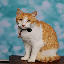

In [ ]:
test_image

In [ ]:
test_image = tf.keras.utils.img_to_array(test_image)

In [ ]:
test_image = np.expand_dims(test_image,axis=0)
test_image

array([[[[ 97., 139., 153.],
         [113., 147., 157.],
         [124., 147., 163.],
         ...,
         [ 67., 137., 149.],
         [ 67., 135., 146.],
         [ 76., 140., 152.]],

        [[ 94., 140., 156.],
         [ 95., 141., 157.],
         [112., 145., 160.],
         ...,
         [ 42., 122., 133.],
         [ 59., 133., 144.],
         [ 73., 139., 151.]],

        [[ 91., 137., 153.],
         [ 93., 139., 155.],
         [114., 146., 161.],
         ...,
         [ 61., 136., 142.],
         [ 57., 131., 142.],
         [ 65., 135., 145.]],

        ...,

        [[  2.,   0.,   1.],
         [  3.,   1.,   2.],
         [  0.,   0.,   0.],
         ...,
         [ 60.,  41.,  37.],
         [ 63.,  46.,  38.],
         [ 68.,  44.,  40.]],

        [[ 26.,  18.,  15.],
         [ 26.,  18.,  15.],
         [ 18.,  15.,  10.],
         ...,
         [ 66.,  47.,  43.],
         [ 64.,  40.,  40.],
         [ 58.,  40.,  40.]],

        [[ 81.,  76.,  70.],
       

In [ ]:
result = cnn.predict(test_image)
result

1/1 [==============================] - 0s 100ms/step


array([[1.]], dtype=float32)

In [ ]:
if result[0][0] == 1:
  prediction = 'Cat'
else:
  prediction = 'Dog'

print(prediction)

Cat
